# Name: KARUNIYA
# reg.no: 212223240068

In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape


11490434/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

In [5]:
X_test.shape


(10000, 28, 28)

In [19]:
single_image= X_train[54845]
single_image.shape


(28, 28)

(60000,)

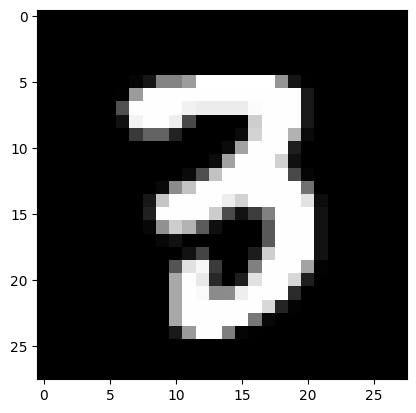

In [20]:
plt.imshow(single_image,cmap='gray')
y_train.shape


In [7]:
X_train.min()
X_train.max()
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [8]:
X_train_scaled.min()
X_train_scaled.max()
y_train[54845]
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [9]:
model=keras.Sequential()

In [10]:
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 32)                173088    
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                        

In [11]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')


In [13]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,batch_size=128, validation_data=(X_test_scaled,y_test_onehot))


Epoch 1/5
469/469 [==============================] - 19s 38ms/step - loss: 0.3490 - accuracy: 0.8961 - val_loss: 0.1904 - val_accuracy: 0.9434
Epoch 2/5
469/469 [==============================] - 26s 56ms/step - loss: 0.1386 - accuracy: 0.9599 - val_loss: 0.1070 - val_accuracy: 0.9684
Epoch 3/5
469/469 [==============================] - 18s 38ms/step - loss: 0.0933 - accuracy: 0.9724 - val_loss: 0.0893 - val_accuracy: 0.9715
Epoch 4/5
469/469 [==============================] - 17s 36ms/step - loss: 0.0714 - accuracy: 0.9787 - val_loss: 0.0751 - val_accuracy: 0.9765
Epoch 5/5
469/469 [==============================] - 18s 37ms/step - loss: 0.0577 - accuracy: 0.9826 - val_loss: 0.0711 - val_accuracy: 0.9788


<Axes: >

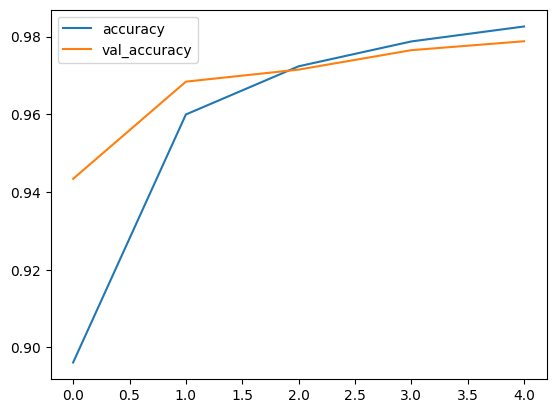

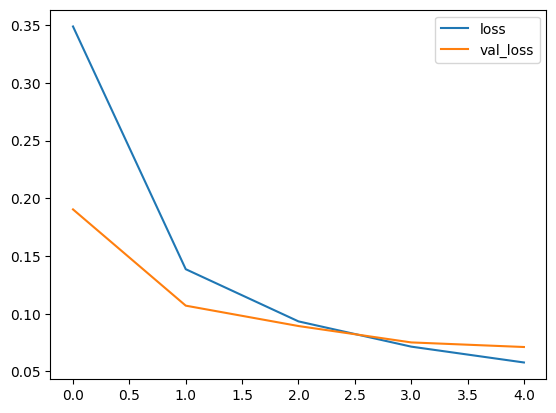

In [14]:
import pandas as pd
metrics = pd.DataFrame(model.history.history)
metrics.head()

metrics[['accuracy','val_accuracy']].plot()

metrics[['loss','val_loss']].plot()

In [15]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

print(confusion_matrix(y_test,x_test_predictions))

print(classification_report(y_test,x_test_predictions))

313/313 [==============================] - 2s 6ms/step
[[ 971    0    0    0    0    1    3    2    2    1]
 [   0 1129    2    1    0    1    1    0    1    0]
 [   4    2 1008    1    2    0    5    6    4    0]
 [   1    0    3  996    0    2    1    2    3    2]
 [   1    1    4    0  957    0    9    0    2    8]
 [   3    1    0   18    1  859    6    0    4    0]
 [   6    3    1    0    1    3  940    1    3    0]
 [   2    6   10    2    0    0    0  998    3    7]
 [   7    1    4    3    1    1    2    1  948    6]
 [   3    4    1    5    6    2    0    3    3  982]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.99      0.96      0.98       892
           6       0.97      0.98  

In [17]:
img = image.load_img('/content/download.png')
type(img)

img = image.load_img('/content/download.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

print(x_single_prediction)




1/1 [==============================] - 0s 29ms/step
[7]


1/1 [==============================] - 0s 27ms/step


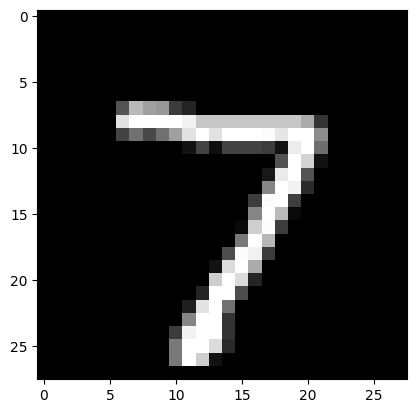

In [18]:

plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)